# SIMULACION RP CONTEO DE PICOS

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
%matplotlib widget

In [9]:
path = "/home/tomi/Documents/academicos/facultad/tesis/tesis/calibration/photon_counting_simulation/data/lifetime_simulation/well_done/01/"

#full_trace_time = np.load(f"{path}/full_trace_lifetime0.200.npy")
df = pd.DataFrame()
for tdly in range(1, 6):
    df = pd.concat([df, pd.read_pickle(f"{path}/time_length0.200_freq5.0_rep0_tdly{tdly}.000.pickle")])

In [10]:
df = df.reset_index()
df

,index,time,ch1
0,0,0.000000,-0.534668
1,1,0.000016,-0.537109
2,2,0.000033,-0.534668
3,3,0.000049,-0.537109
4,4,0.000066,-0.537109
...,...,...,...
61035,12203,0.999997,-0.534668
61036,12204,1.000014,-0.534668
61037,12205,1.000030,-0.537109
61038,12206,1.000047,-0.537109


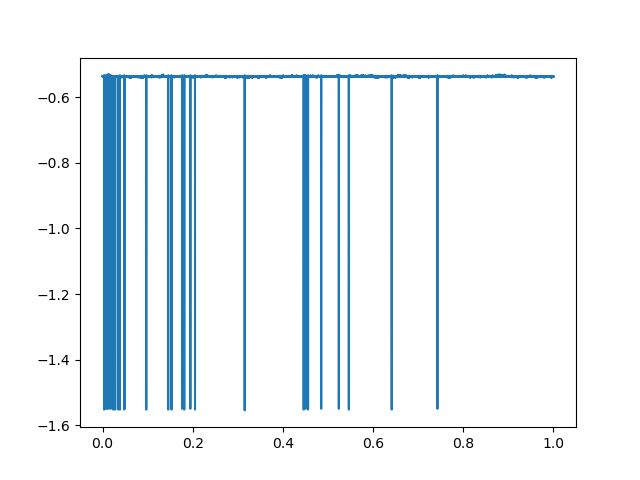

In [21]:
plt.close('all')
def count_peaks(df):
    derivative = np.diff(df["ch1"])
    print(len(derivative), df.shape)
    peaks = np.where(derivative > 0.5)[0]
    #plt.plot(derivative)
    plt.plot(np.arange(len(df["time"])), df["ch1"], '.-')
    print(df)
    print(peaks)
    plt.plot(peaks, df.loc[peaks, "ch1"],'o')

def count_peaks(df):
    print(df.iloc[np.where(np.diff(df.ch1) < -0.5)[0], :])
    return df.iloc[np.where(np.diff(df.ch1) < -0.5)[0], :]


plt.plot(df["time"], df["ch1"])

       index      time       ch1
208      208  0.003408 -0.839844
419      419  0.006865 -0.534668
616      616  0.010093 -1.025391
825      825  0.013517 -0.908203
1116    1116  0.018285 -0.930176
1421    1421  0.023282 -0.537109
1556    1556  0.025494 -0.537109
1709    1709  0.028000 -0.537109
2131    2131  0.034914 -0.534668
2349    2349  0.038486 -0.537109
2917    2917  0.047792 -0.537109
2977    2977  0.048775 -0.722656
5917    5917  0.096944 -0.534668
8883    8883  0.145539 -0.537109
9332    9332  0.152895 -0.534668
10755  10755  0.176210 -0.537109
11058  11058  0.181174 -0.607910
11883  11883  0.194691 -0.537109
12512    304  0.204997 -0.927734
19235   7027  0.315146 -0.952148
27221   2805  0.445989 -0.837402
27486   3070  0.450331 -0.905762
27817   3401  0.455754 -0.742188
29595   5179  0.484884 -0.534668
31980   7564  0.523960 -0.766602
33334   8918  0.546144 -0.537109
39136   2512  0.641204 -0.537109
45328   8704  0.742654 -0.637207


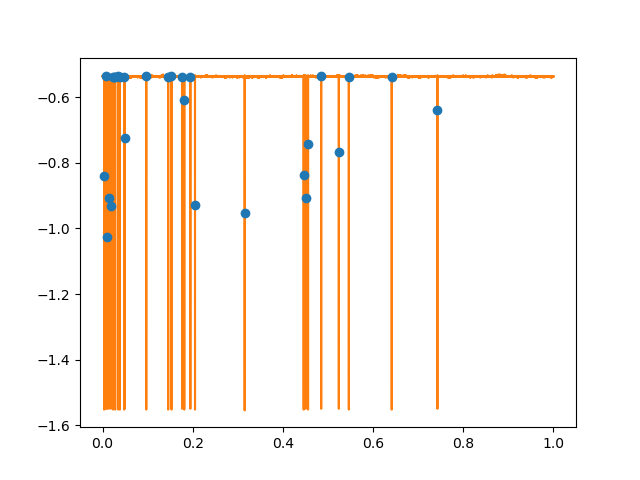

In [22]:
peaks = count_peaks(df)
plt.close('all')
plt.plot(df.time, df.ch1, color="C1")
plt.plot(peaks.time, peaks.ch1, 'o', color="C0")
plt.show()